In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

from phasor.signals.pade_fit.pade_fit import ratsvd

import scipy.signal

b'2017-10-05 11:02:53 -0400 (1382d566d0fb7998941c2fd1b1f32b2574a62ca1)'


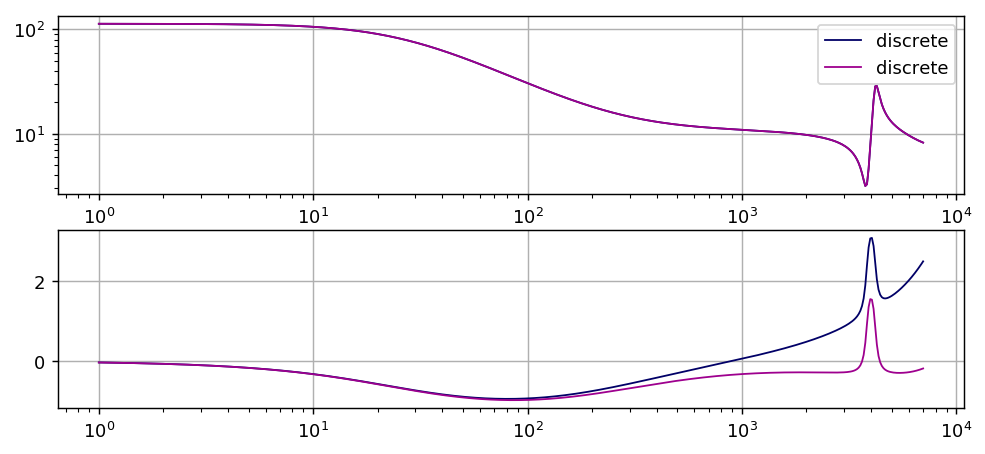

In [82]:
F_nyquist = 16384 / 2
F_AC = F_nyquist * 2 * np.arange(0, 1001) / 301
    
F_AC = logspaced(1, 7000, 500)
ZPKz = (
    [
        .9,
        -.3,
        .1+.95j,
        .1-.95j,
    ], 
    [
        #.9,
        .99,
        #.97,
        -0.03+.95j,
        -.03-.95j,
        #-.2,
    ], 
    10
)


b,a = scipy.signal.zpk2tf(*ZPKz)


Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz_zpk(*ZPKz , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b, a , worN = F_AC / F_nyquist * np.pi)
#F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

Fb.ax0.legend()

In [83]:
b

array([ 10.     ,  -8.     ,   7.625  ,  -4.935  ,  -2.46375])

In [84]:
R = np.random.randn(len(F_AC)) + 1j*np.random.randn(len(F_AC))
F_noise = F_exact * (1 + R / 10)

In [85]:
fitz = ratsvd(F_AC, F_noise, W = 10, 
              order_a = 10, order_b = 10, 
              F_nyquist= F_nyquist,
              max_size = 100,
              ms_method = 'sum',
              #aorder_min = 300,
             )
#fits

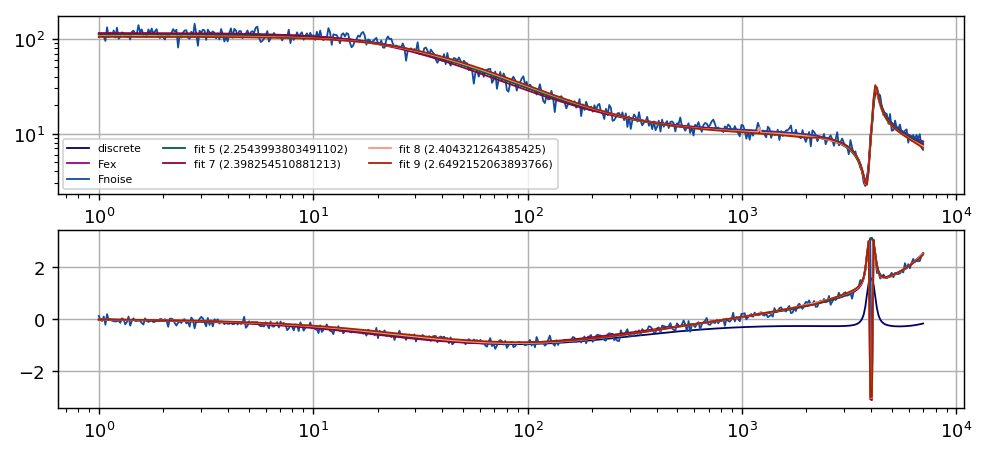

In [86]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

h = F_exact
Fb.ax0.loglog(F_AC, abs(F_exact), label = 'Fex')
Fb.ax1.semilogx(F_AC, np.angle(F_exact), label = 'Fex')

h = F_exact
Fb.ax0.loglog(F_AC, abs(F_noise), label = 'Fnoise')
Fb.ax1.semilogx(F_AC, np.angle(F_noise), label = 'Fnoise')


for ftup in fitz[:4]:
    res, b_fit, a_fit, order_b, order_a, F_rescale = ftup
    w, h = scipy.signal.freqz(b_fit, a_fit, worN = F_AC / F_rescale * np.pi)
    Fb.ax0.loglog(
        F_AC, 
        abs(h), 
        label = 'fit {order_b} ({res})'.format(
            order_a = order_a, 
            order_b = order_b,
            res = res,
        ),
        #color = 'green',
    )
    Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit')

Fb.ax0.legend(ncol = 3, fontsize = 6)

In [80]:
fits = ratsvd(F_AC, F_exact, W = 10, 
              order_a = 10, order_b = 10, 
              F_nyquist=None,
              max_size = 100,
              ms_method = 'sum',
              #aorder_min = 300,
             )
fits

[(5012.4666005145646,
  array([-1.49875798 +4.95203957e-16j,  7.84181527 -6.41242295e-15j,
          2.28422868 +7.86812121e-16j]),
  array([ -2.35829804e-02,  -9.99721779e-01,  -4.54743142e-04]),
  3,
  3,
  3499.9999999999995),
 (8699.6648285213741, array([ -9.51940770e-03 -1.02331056e-17j,
          -1.38386334e+00 +6.72418751e-16j,
           1.56778773e+01 +1.41902544e-14j,   4.65657023e+00 +4.78043479e-16j]), array([ -2.35159814e-02,  -9.99718100e-01,  -4.58020703e-04,
          -3.24175286e-03]), 4, 4, 3499.9999999999995),
 (6053860.7875218187, array([  5.02665041e-03 +1.18567117e-18j,
           6.22585491e-02 -4.83049242e-14j,
           8.52096145e+00 -2.29103751e-15j,
          -3.13463960e+01 -6.14355685e-14j,  -8.98692680e+00 +4.12242822e-15j]), array([  2.35165893e-02,   9.99713631e-01,   4.77511902e-04,
           4.40431713e-03,   5.42402973e-07]), 5, 5, 3499.9999999999995),
 (13611162.002975743,
  array([ 3.99987093 +1.09338121e-17j,  1.15678414 +0.00000000e+00j]),
  a

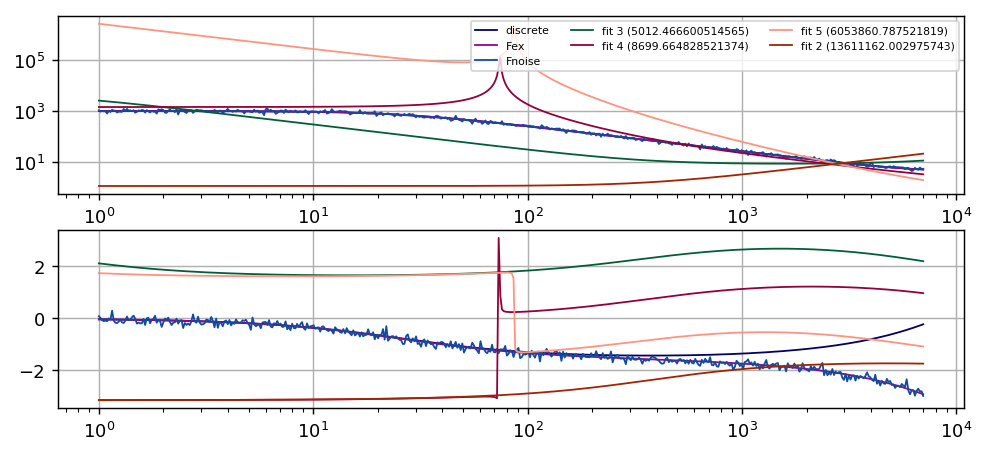

In [81]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

h = F_exact
Fb.ax0.loglog(F_AC, abs(F_exact), label = 'Fex')
Fb.ax1.semilogx(F_AC, np.angle(F_exact), label = 'Fex')

h = F_exact
Fb.ax0.loglog(F_AC, abs(F_noise), label = 'Fnoise')
Fb.ax1.semilogx(F_AC, np.angle(F_noise), label = 'Fnoise')



for ftup in fits[:4]:
    res, b_fit, a_fit, order_b, order_a, F_scale = ftup
    w, h = scipy.signal.freqs(b_fit, a_fit, worN = F_AC / F_rescale * 2 * np.pi)
    Fb.ax0.loglog(
        F_AC, 
        abs(h), 
        label = 'fit {order_b} ({res})'.format(
            order_a = order_a, 
            order_b = order_b,
            res = res,
        ),
        #color = 'green',
    )
    Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit')

Fb.ax0.legend(ncol = 3, fontsize = 6)